In [1]:
import numpy as np
import os
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
%matplotlib inline  
print ("Package loaded") 
cwd = os.getcwd()
print ("Current folder is %s" % (cwd) )

Package loaded
Current folder is C:\Users\Administrator\Desktop\tensor\Tensorflow-101\notebooks


In [2]:
# Training set folder 
paths = {"../../img_dataset/celebs/Arnold_Schwarzenegger"
        , "../../img_dataset/celebs/Junichiro_Koizumi"
        , "../../img_dataset/celebs/Vladimir_Putin"
        , "../../img_dataset/celebs/George_W_Bush"}
# The reshape size
imgsize = [64, 64]
# Grayscale
use_gray = 1
# Save name
data_name = "custom_data"

print ("Your images should be at")
for i, path in enumerate(paths):
    print (" [%d/%d] %s/%s" % (i, len(paths), cwd, path)) 

print ("Data will be saved to %s" 
       % (cwd + '/data/' + data_name + '.npz'))

Your images should be at
 [0/4] C:\Users\Administrator\Desktop\tensor\Tensorflow-101\notebooks/../../img_dataset/celebs/Arnold_Schwarzenegger
 [1/4] C:\Users\Administrator\Desktop\tensor\Tensorflow-101\notebooks/../../img_dataset/celebs/Junichiro_Koizumi
 [2/4] C:\Users\Administrator\Desktop\tensor\Tensorflow-101\notebooks/../../img_dataset/celebs/George_W_Bush
 [3/4] C:\Users\Administrator\Desktop\tensor\Tensorflow-101\notebooks/../../img_dataset/celebs/Vladimir_Putin
Data will be saved to C:\Users\Administrator\Desktop\tensor\Tensorflow-101\notebooks/data/custom_data.npz


In [3]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        # print ("Current Image if GRAY!")
        return rgb

In [23]:
nclass     = len(paths)
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg"]
imgcnt     = 0
for i, relpath in zip(range(nclass), paths):
    path = cwd + "/" + relpath
    flist = os.listdir(path)
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath = os.path.join(path, f)
        currimg  = imread(fullpath)
        # Convert to grayscale  
        if use_gray:
            grayimg  = rgb2gray(currimg)
        else:
            grayimg  = currimg
        # Reshape
        graysmall = imresize(grayimg, [imgsize[0], imgsize[1]])/255.
        grayvec   = np.reshape(graysmall, (1, -1))
        # Save 
        curr_label = np.eye(nclass, nclass)[i:i+1, :]
        if imgcnt is 0:
            totalimg   = grayvec
            totallabel = curr_label
        else:
            totalimg   = np.concatenate((totalimg, grayvec), axis=0)
            totallabel = np.concatenate((totallabel, curr_label), axis=0)
        imgcnt    = imgcnt + 1
print ("Total %d images loaded." % (imgcnt))

D:\soft\python\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
D:\soft\python\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Total 681 images loaded.


3 4
[[0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
(250, 250, 3)
(250, 250)
681

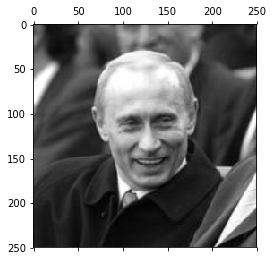

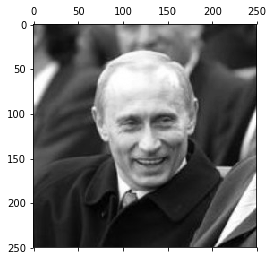

In [35]:
np.eye(nclass, nclass)[i:i+1, :]
print(i,nclass)
np.eye(nclass, nclass)[i:i+1, :]
totalimg.shape
totallabel
print(curr_label)
print(np.eye(nclass, nclass))
print(currimg.shape)
print(grayimg.shape)
plt.matshow(currimg[...,1],cmap=plt.get_cmap('gray'))##取出任意的通道数据来做转化为只含有一维的数据
plt.draw()
plt.matshow(grayimg,cmap=plt.get_cmap('gray'))
plt.draw()
print(imgcnt)

In [6]:
def print_shape(string, x):
    print ("Shape of '%s' is %s" % (string, x.shape,))
    
randidx    = np.random.randint(imgcnt, size=imgcnt)
trainidx   = randidx[0:int(3*imgcnt/5)]
testidx    = randidx[int(3*imgcnt/5):imgcnt]
trainimg   = totalimg[trainidx, :]
trainlabel = totallabel[trainidx, :]
testimg    = totalimg[testidx, :]
testlabel  = totallabel[testidx, :]
print_shape("trainimg", trainimg)
print_shape("trainlabel", trainlabel)
print_shape("testimg", testimg)
print_shape("testlabel", testlabel)

Shape of 'trainimg' is (408, 4096)
Shape of 'trainlabel' is (408, 4)
Shape of 'testimg' is (273, 4096)
Shape of 'testlabel' is (273, 4)


In [36]:
savepath = cwd + "/data/" + data_name + ".npz"
np.savez(savepath, trainimg=trainimg, trainlabel=trainlabel
         , testimg=testimg, testlabel=testlabel, imgsize=imgsize, use_gray=use_gray)
print ("Saved to %s" % (savepath))

Saved to C:\Users\Administrator\Desktop\tensor\Tensorflow-101\notebooks/data/custom_data.npz


In [38]:
# Load them!
cwd = os.getcwd()
loadpath = cwd + "/data/" + data_name + ".npz"
l = np.load(loadpath)

# See what's in here
l.files

# Parse data
trainimg_loaded = l['trainimg']
trainlabel_loaded = l['trainlabel']
testimg_loaded = l['testimg']
testlabel_loaded = l['testlabel']

print ("%d train images loaded" % (trainimg_loaded.shape[0]))
print ("%d test images loaded" % (testimg_loaded.shape[0]))
print ("Loaded from to %s" % (savepath))

408 train images loaded
273 test images loaded
Loaded from to C:\Users\Administrator\Desktop\tensor\Tensorflow-101\notebooks/data/custom_data.npz


In [40]:
l['use_gray']

array(1)

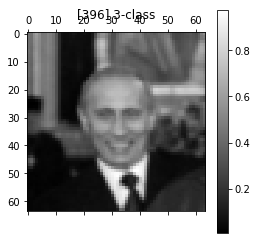

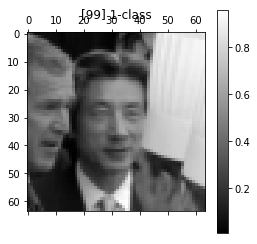

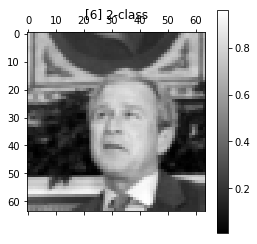

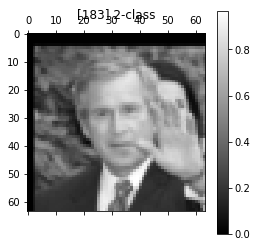

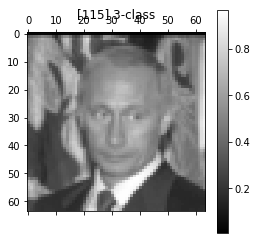

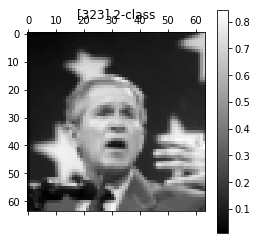

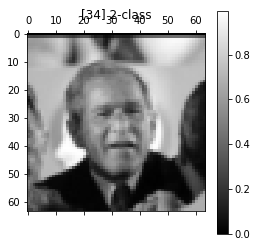

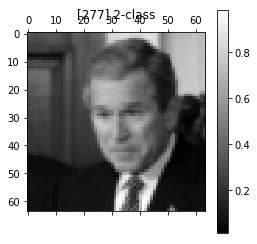

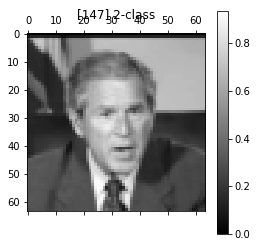

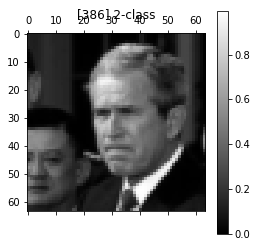

In [9]:
ntrain_loaded = trainimg_loaded.shape[0]
batch_size = 10;
randidx = np.random.randint(ntrain_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(trainimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = trainlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    if use_gray:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], -1))
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], imgsize[1], 3))
        plt.imshow(currimg)
    title_string = "[%d] %d-class" % (i, currlabel)
    plt.title(title_string) 
    plt.show()

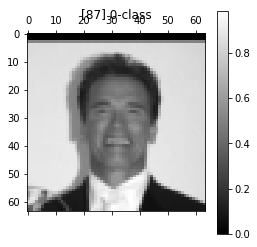

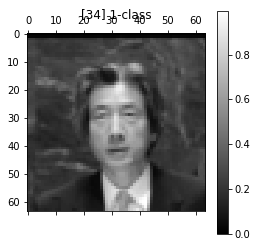

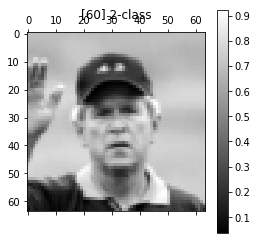

In [10]:
# Do batch stuff using loaded data 
ntest_loaded = testimg_loaded.shape[0]
batch_size   = 3;
randidx      = np.random.randint(ntest_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(testimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = testlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    
    if use_gray:
        currimg = np.reshape(testimg[i, :], (imgsize[0], -1))
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else:
        currimg = np.reshape(testimg[i, :], (imgsize[0], imgsize[1], 3))
        plt.imshow(currimg)
    title_string = "[%d] %d-class" % (i, currlabel)
    plt.title(title_string) 
    plt.show()